# Machine Learning with `NumPy`
This notebook will go through a simple multi-classification task by building a machine learning classifier only using simple libraries such as `NumPy`, to inspect how machine learning works under the hood.

## Import libraries

In [1]:
import numpy as np
import autograd.numpy.linalg as linalg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
GLOBAL_SEED = 42

## Load & Inspect the data
To avoid losing focus from the main task, which is showing how machine learning works under the hood, an already pre-processed and cleaned datase will be used.

In [3]:
# Palmer Penguins dataset provided by Arroyo (2023)
data = pd.read_csv("penguins_binary_classification.csv", header=0)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


The data has been loaded correctly. The next steps will be to quickly inspect the shape, information, and descriptive statistics of the data.

In [4]:
# The dataset shape is particularly important when dealing with matrix operations directly
data.shape

(274, 7)

In [5]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


Brilliant, there are not `NaN` values, and all features are of the correct data type, with the exception of the target variable `species`, which will be encoded, and the variable `island`, which needs to be encoded too.

**Tasks:**
- Encode `species` and ` variable.

In [7]:
# Show duplicates, which would be dropped with `data.drop_duplicates()`
data[data.duplicated(keep=False)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year


The data has no duplicates.

In [8]:
# Return the descriptive statistics
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693,2008.043796
std,5.195566,2.013410,15.047938,835.933105,0.806281
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.350000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4262.500000,2008.000000
75%,46.675000,18.500000,215.000000,4950.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


All values seem within a reasonable range, with values close between features. However, it is worth scaling the data anyway.

Before moving to the modelling phase, the duplicates can be removed. This toy dataset is already pretty small (only 150 instances), so one needs to be careful when removing data, because too many precious instances can be lost. However, especially since the dataset is so small, having duplicated observations may lead to the overrepresentation of certain classes and/or characteristics.

Finally, the target variable `species` needs to be encoded into numerical classes. Moreover, also the `island` feature needs to be encoded. For the latter however, it is necessary to see how many unique values it contains, to decide whether it should be one hot encoded or not.

In [9]:
# Validate what type of encoding is needed
print(data["island"].value_counts())
# Double-check that the task is indeed binary classification
print(data["species"].value_counts())
# Inspect the variable `year`, which is potentially to remove
print(data["year"].value_counts())

island
Biscoe       167
Dream         56
Torgersen     51
Name: count, dtype: int64
species
Adelie    151
Gentoo    123
Name: count, dtype: int64
year
2008    96
2009    95
2007    83
Name: count, dtype: int64


The task is indeed a binary classification task. However, the feature `island` needs to be one-hot encoded. Last but not least, the `year` column shows how domain expertise can be crucial when choosing what features to drop (together with duplicates and outliers removal). Personally, I do not have any expertise on the subject, so for this particular exercise, I will decide to drop the `year` feature, because I do not deem it relevant in predicting the species, and to illustrate how to drop columns. However, in a typical machine learning project, one should perform exploratory data analysis, for example by analysing the correlations and/or feature contribution to the target variable. This may reveal that the feature is actually relevant or that it may bring information that would lead to overfitting (e.g., if most data of a certain species has been collected in a particular year).

In [10]:
# This can be done either by mapping the labels into a dictionary, 
# which is managiable, since they are only 3
species_map = {"Adelie": 0, "Gentoo": 1}
data = data.copy()
data["species_encoded"] = data["species"].map(species_map)

# Or automatically
data["species_encoded_2"], encoded = pd.factorize(data["species"])
print(encoded)

Index(['Adelie', 'Gentoo'], dtype='object')


In [11]:
# One-hot encode the `island` feature
data_encoded = pd.get_dummies(data, columns=["island"], dtype=int)

In [12]:
data_encoded.head(-5)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_encoded,species_encoded_2,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,0,0,0,1
3,Adelie,36.7,19.3,193.0,3450.0,2007,0,0,0,0,1
4,Adelie,39.3,20.6,190.0,3650.0,2007,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
264,Gentoo,51.5,16.3,230.0,5500.0,2009,1,1,1,0,0
265,Gentoo,46.2,14.1,217.0,4375.0,2009,1,1,1,0,0
266,Gentoo,55.1,16.0,230.0,5850.0,2009,1,1,1,0,0
267,Gentoo,44.5,15.7,217.0,4875.0,2009,1,1,1,0,0


We do not need both `species_encoded` and `species_encoded_2` columns; that was just for illustrative purposes, hence we can drop one of the two. Moreover, we do not need the original column `species` either, and it will be dropped to allow for numerical features only. On the other hand, `island` was automatically dropped by `pd.get_dummies()` when one-hot encoding. Last, as decided, the `year` feature will be dropped too.

In [13]:
cleaned_data = data_encoded.drop(["species", "species_encoded_2", "year"], axis=1)
# cleaned_data = data_encoded.drop(columns=["species", "island", "species_encoded_2"]) # alternatively
# Move the target variable at the end for easy splitting
cols = [col for col in cleaned_data.columns if col != "species_encoded"] + ["species_encoded"]
cleaned_data = cleaned_data[cols]

cleaned_data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_encoded
0,39.1,18.7,181.0,3750.0,0,0,1,0
1,39.5,17.4,186.0,3800.0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,0
3,36.7,19.3,193.0,3450.0,0,0,1,0
4,39.3,20.6,190.0,3650.0,0,0,1,0


## Split data

### Helper functions for data pre-processing
From now on we are going to need several helper functions, which will be incldued at the beginning of each paragraph.

In [14]:
def train_test_split(X, y, test_size=0.25, seed=None):
    n = X.shape[0]
    idx = np.arange(n)
    if seed is not None:
        rng = np.random.default_rng(seed)
        rng.shuffle(idx)
    else:
        np.random.shuffle(idx)
    cut = int(n * (1 - test_size))
    train_idx = idx[:cut]
    test_idx = idx[cut:]
    
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

In [15]:
def standardise_training_data(training_data, test_data):
    """
    Standardise the training data so that each feature column
    has a mean of 0 and a standard deviation of 1.

    Test data is scaled using the same mean and standard 
    deviation as the training data.

    Args:
        training_data (np.ndarray): Training data matrix, shape (n, d)
        test_data (np.ndarray, optional): Test data matrix, shape (m, d)

    Returns:
        scaled_train (np.ndarray): Standardised training data, shape (n, d)
        scaled_test (np.ndarray or None): Standardised test data, shape (m, d)
        std (np.ndarray): Original standard deviations, shape (d,)
        mu (np.ndarray): Original means, shape (d,)
    
    """
        
    # Compute mean and standard deviation for each feature column
    mu = np.mean(training_data, axis=0)
    std = np.std(training_data, axis=0)
    
    # Standardize the training data
    scaled_train = (training_data - mu) / std

    # Standardize test data using training mean and std
    scaled_test = (test_data - mu) / std
    
    return scaled_train, scaled_test, std, mu

In [16]:
def unscale_data(scaled_train, original_std, original_mu):
    """
    Unscale scaled data or predictions.
    
    Args:
        scaled_train (numpy array): Training data matrix, shape (n, d)
        original_std (numpy array): Original standard deviations, shape (n, d)
        original_mu (numpy array): Original means, shape (n, d)
    
    Returns:
        scaled_train (numpy array): Standardised training data, shape (n, d)

    """
        
    # Standardize the feature columns
    unscaled_train = (scaled_train * original_std) + original_mu
    
    return unscaled_train

### Data pre-processing

Normally we would care about retaining the features' names, for interpretability and other reasons. However, in this example, we are focusing on the `NumPy` implementaiton and the math involved, and to ease the process, the `pd.DataFrame` will be convertend into a `np.ndarray` format, thus loosing features' names.

In [17]:
# Convert into a np.ndarray
dataset = np.array(cleaned_data)
# Split X and y
X, y = dataset[:, 0:7], dataset[:, -1]
# Validate shapes
print(X.shape)
print(y.shape)

(274, 7)
(274,)


In [18]:
# Validate target data
# It can be seen that the data must be shuffled when splitting
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, seed=GLOBAL_SEED)
print(f"SHAPES: Xtrain: {Xtrain.shape}, Xtest: {Xtest.shape}, ytrain: {ytrain.shape}, ytest: {ytest.shape}")

SHAPES: Xtrain: (205, 7), Xtest: (69, 7), ytrain: (205,), ytest: (69,)


In [20]:
# See if the training data have been correctly shuffled
# Don't look at the test data anymore!
print(ytrain)

[0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.]


In [21]:
# Scaling data will help with convergence
scaled_Xtrain, scaled_Xtest, std, mu = standardise_training_data(Xtrain, Xtest)

In [22]:
# Add a dummy column to the data
Xtrain_dummy = np.column_stack((np.ones(scaled_Xtrain.shape[0]), scaled_Xtrain))
Xtest_dummy = np.column_stack((np.ones(scaled_Xtest.shape[0]), scaled_Xtest))

## Modelling

### Helper functions for modelling
For a classification task we need to use the sigmoid function:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

and the cross-entropy loss as the objective function:

$$
L(\mathbf{w})=  \frac{1}{n}\sum_{i=1}^n -{y^{(i)}} \ln \sigma^{(i)}- (1- y^{(i)}) \ln (1-\sigma^{(i)})
$$

where $\sigma^{(i)} =\sigma(\mathbf{w}^\top\mathbf{x}^{(i)} + b).$

In [23]:
def sigmoid(z):
    """
    
    Sigmoid function.
    
    """
    
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid

In [24]:
def predictions_and_sigmoid(w, X):
    """
    Compute the predictions with linear combination and 
    apply the sigmoid function to squosh the predictions to 0 or 1.

    Args:
        X (numpy array): Input features, shape (n, d)
        w (numpy array): Regression weights, shape (K,)

    Returns:
        Logistic regression (integer - scalar)
    
    """
    # Compute the predictions with linear combination
    z = X @ w
    # Apply the sigmoid function to squosh the predictions to 0 or 1
    sigma = sigmoid(z)

    sigma

In [25]:
def cross_entropy_loss(w, X, y_true, epsilon=1e-15):

    """
    Compute the cross-entropy-loss.

    Args:
        X (numpy array): Input features, shape (n, d)
        w (numpy array): Regression weights, shape (K,)
        y_true (numpy array): True target values (n,)
        epsilon (float): Small value to prevent log(0) issues

    Returns:
        Cross-entropy-loss (float - scalar)
    
    """

    # Computing the predictions with linear combination
    z = X @ w
    # Applying the sigmoid function to squosh the predictions to 0 or 1
    sigma = sigmoid(z)

    # Applying np.where to replace 0s and 1s with epsilon adjustments
    # This approach is slightly less efficient but will edit only values that
    # are exactly 0 or 1, preserving more original values
    sigma = np.where(sigma == 0, epsilon, sigma)
    sigma = np.where(sigma == 1, 1 - epsilon, sigma)

    # Clip sigma to avoid log(0) and log(1) issues
    # A more efficient approach is to clip all predictions very close to 0 or 1
    # Predicitons very close to 0 or 1 can still cause log(0) and log (1) issues
    # So this approach is also more numerically stable
    #sigma = np.clip(sigma, epsilon, 1 - epsilon)

    # Compute the cross-entropy loss
    CEloss = -np.mean(y_true * np.log(sigma) + (1 - y_true) * np.log(1 - sigma))

    return CEloss

In [26]:
def cross_entropy_l2_loss(w, X, y, lam):
    """
    Compute the cross-entropy-loss with L2 (Ridge) regularisation.

    Args:
        X (numpy array): Input features, shape (n, d)
        w (numpy array): Regression weights, shape (K,)
        y_true (numpy array): True target values (n,)
        lam (float): regularisation/penalty coefficient

    Returns:
        Cross-entropy-loss (float - scalar)
    
    """

    CEloss = cross_entropy_loss(w, X, y)

    # Compute the L2 penalty term and exclude the bias
    l2_penalty = (0.5 * lam) * np.sum(w[1:] ** 2)

    # Apply L2 regularisation to the cross-entropy loss
    l2_regularized_loss = CEloss + l2_penalty

    return l2_regularized_loss

In [27]:
def gradient_ce_loss(w, X, y):

    """
    Compute the gradient for logistic regression.

    Args:
        X (numpy array): Input features, shape (n, d)
        w (numpy array): Regression weights, shape (K,)
        y_true (numpy array): True target values (n,)

    Returns:
        Gradient (float - scalar)
    
    """

    n = X.shape[0]

    # Compute the predictions with linear combination
    z = X @ w
    # Apply the sigmoid function to squosh the predictions to 0 or 1
    sigma = sigmoid(z)

    # Compute the gradient CE loss
    grad_CE_loss = (X.T @ (sigma - y)) / n
    
    # For versions older than Python 3.5, use 'np.dot' instead of '@', as below
    # grad_CE_loss = np.dot(X.T, (sigma - y)) / n
    
    return grad_CE_loss

In [28]:
def gradient_l2_ce_loss(w, X, y, lam):
    """
    Compute the gradient with L2 (Ridge) regularisation 
    for logistic regression.

    Args:
        X (numpy array): Input features, shape (n, d)
        w (numpy array): Regression weights, shape (K,)
        y_true (numpy array): True target values (n,)
        lam (float): regularisation/penalty coefficient

    Returns:
        Gradient (float - scalar)
    
    """

    grad_CE_loss = gradient_ce_loss(w, X, y)

    # Add the gradient of the L2 penalty (excluding the bias)
    grad_l2_penalty = lam * w
    grad_l2_penalty[0] = 0

    # Add L2 penalty to the gradient
    grad_l2_CE_loss = grad_CE_loss + grad_l2_penalty

    return grad_l2_CE_loss

In [29]:
def grad_logistic_regression_reg(X, y, gamma, lam = 0, tol= 1e-4, maxIters= 100):
    """
    Compute the gradient for logistic regression
    with L2 (Ridge) regularisation.

    Args:
        X (numpy array): Input features, shape (n, d)
        y_true (numpy array): True target values (n,)
        gamma (float): learning rate or step size
        lam (float): regularisation/penalty coefficient
        tol (float): tollerance
        maxIters (integer): maximum number of training iterations

    Returns:
        w0 (list): list of optimised weights
        losses (list): list of training Cross-Entropy losses for each iteration
    
    """

    n, d = X.shape

    # initialise w0
    w0 = np.zeros(d)
    losses = []

    # loop until converge
    for i in range(maxIters):
        # Compute the loss and gradient
        CEloss = cross_entropy_l2_loss(w0, X, y, lam)
        grad_CE_l2_loss = gradient_l2_ce_loss(w0, X, y, lam)

        # Append the loss
        losses.append(CEloss)

        # Update the weights using gradient descent
        w0 = w0 - gamma * grad_CE_l2_loss

        # Check for convergence of the algorithm
        if linalg.norm(grad_CE_l2_loss) < tol:
            print(f"Converged after {i + 1} iterations because of small gradient.")
            break
    
    #The outputs don't need flattening, as they are already 1D arrays
    #Losses are converted into numpy arrays for consistency and efficiency
    return w0, np.array(losses)

In [30]:
def logistic_regression_reg_sgd_train(X, y_true, gamma, lam = 1.0, tol= 1e-4, maxIters= 100, seed=None):
    """
    Compute the gradient for logistic regression
    with L2 (Ridge) regularisation
    and Stochastic Gradient Descent (SGD).

    Args:
        X (numpy array): Input features, shape (n, d)
        y_true (numpy array): True target values (n,)
        gamma (float): learning rate or step size
        lam (float): regularisation/penalty coefficient
        tol (float): tollerance
        maxIters (integer): maximum number of training iterations

    Returns:
        w0 (list): list of optimised weights
        losses (list): list of training Cross-Entropy losses for each iteration
    
    """

    n, d = X.shape 
    # initialise w0
    w0 = np.zeros(d)
    losses = []

    # Set a random seed for reproducibility
    np.random.seed(seed)

    for iter in range(maxIters):
        # Shuffle the dataset at the beginning of each epoch
        indices = np.arange(n)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y_true[indices]

        for i in range(n):
            # Select a single observation (mini-batch size of 1)
            # xi is shape: (1, d)
            xi = X_shuffled[i:i+1]
            # yi is shape: (1,)
            yi = y_shuffled[i:i+1]

            # Compute the gradient for each observation
            grad = gradient_l2_ce_loss(w0, xi, yi, lam)

            # Update weights using SGD
            w0 -= gamma * grad.flatten()

        # Compute the loss for the current epoch
        loss = cross_entropy_l2_loss(w0, X, y_true, lam)
        losses.append(loss)

        # Check for convergence
        if iter > 0 and abs(losses[-2] - losses[-1]) < tol:
            print(f"Converged after {iter + 1} iterations because of small gradient.")
            break

    return w0, np.array(losses)

In [31]:
def plot_losses(losses: list, loss_type="Cross Entropy Loss"):
    """
    Plot the losses for each iteration.

    Args:
        losses(numpy array): array of losses (iters,)
    
    """
    
    loss_type = loss_type

    plt.plot(losses, label=f"{loss_type}")
    plt.title(f"{loss_type}")
    plt.xlabel("Iterations")
    plt.ylabel("Cross Entropy Loss")
    plt.legend()
    plt.show()

### Train the model

In [32]:
# Select a learning rate `gamma`
gamma = 0.02
lam = 0.1

In [58]:
w, losses = grad_logistic_regression_reg(Xtrain_dummy, ytrain, gamma, lam = lam, tol= 1e-4, maxIters= 1000000)

Converged after 4015 iterations because of small gradient.


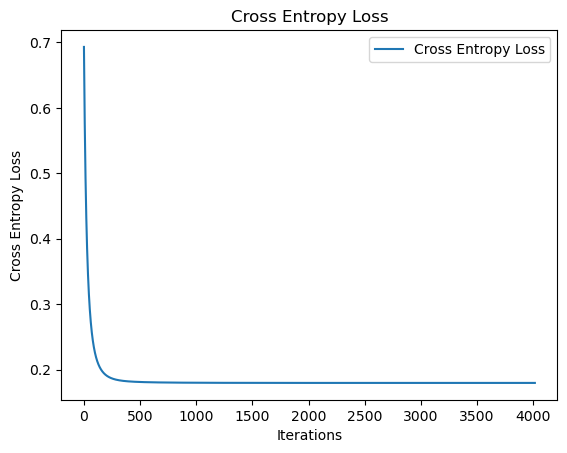

In [59]:
plot_losses(losses)

In [60]:
# Print the parameters and losses
print(w)
print(losses[::-1])

[-0.38979527  0.528006   -0.75043623  0.64147129  0.52081104  0.38860756
 -0.23060401 -0.24773883]
[0.17968498 0.17968498 0.17968498 ... 0.65611529 0.67419644 0.69314718]


The elbow of the curve shows a good convergence, which indicates, among other things, that the learning rate is within a good range, although a proper end-to-end machine learning project would experiment with different learning rates and use adaptive optimisation methods.

After `4015` iterations, the training satisfied our conversion criteria `linalg.norm(grad_CE_l2_loss) < tol`, which means that the gradient is small and below the set tolerance. In fact, it is possible to see that the loss did not improve at least in the last three iterations, `[0.17968498 0.17968498 0.17968498]`, because the gradient was too small and the loss function had nowhere to go.

We can see great improvements in the cross entropy loss, which got one order of magnitude smaller, from `0.69314718` to `0.17968498`, but the generalizability of results needs to be evaluated by computing the test cross-entropy loss.

### Validate the gredient calculation with the finite difference method
Before progressing further, one should check whether the gradient calculation is being performed correctly, by using the finite difference method.

In [36]:
def compute_analytical_gradient(reg_type, w, Phi, y_true, lam=0):
    """
    Compute the analytical gradient of the loss.
    
    Args:
        reg_type (str): "linear" or "logistic"
        w (numpy array): Model weights, shape (K,)
        Phi (numpy array): Design matrix, shape (n, K)
        y_true (numpy array): Target values, shape (n,)
        lam (float): Regularization parameter (default: 0)
    
    Returns:
        analytical_gradient (numpy array)

    """

    if reg_type == "linear":
        # Gradient needs to be zero when validating fixed basis expansion
        analytical_gradient = grad_linear_reg(Phi, y_true, w, lam)
    elif reg_type == "logistic":
        analytical_gradient = gradient_l2_ce_loss(w, Phi, y_true, lam)
    else:
        raise ValueError("Invalid reg_type. Use 'linear' or 'logistic'.")

    return analytical_gradient

In [37]:
def compute_finite_difference_gradient(reg_type, w, Phi, y_true, h=1e-4, lam=0):
    """
    Compute the numerical gradient using the finite difference method.
    
    Args:
        reg_type (str): "linear" or "logistic"
        w (numpy array): Model weights, shape (K,)
        Phi (numpy array): Design matrix, shape (n, K)
        y_true (numpy array): Target values, shape (n,)
        h (float): Small perturbation for finite difference (default: 1e-5)
        lam (float): Regularization parameter (default: 0)
    
    Returns:
        finite_diff_gradient (numpy array)

    Notes:
        To perform unregolarised logistic regression, use 0 as lambda, 
        which is the default value.

    """

    if reg_type == "linear":
        # The predictions are calculated directly in the argument
        # With 'Phi @ w_' thanks to the lambda function
        loss_func = lambda w_: mse_loss_reg(y_true, Phi @ w_, w_, lam)
    elif reg_type == "logistic":
        loss_func = lambda w_: cross_entropy_l2_loss(w_, Phi, y_true, lam)
    else:
        raise ValueError("Invalid reg_type. Use 'linear' or 'logistic'.")

    n_params = w.shape[0]
    finite_diff_gradient = np.zeros_like(w)

    for i in range(n_params):
        # Create perturbation vector
        perturb = np.zeros_like(w)
        perturb[i] = h

        # Compute perturbed losses
        loss_plus = loss_func(w + perturb)
        loss_minus = loss_func(w - perturb)

        # Compute finite difference
        finite_diff_gradient[i] = (loss_plus - loss_minus) / (2 * h)

    return finite_diff_gradient

In [38]:
def validate_finite_difference(reg_type, w, Phi, y_true, h=1e-4, lam=0):
    """
    Validate analytical gradient using finite difference.
    
    Args:
        reg_type (str): "linear" or "logistic"
        w (numpy array): Model weights, shape (K,)
        Phi (numpy array): Design matrix, shape (n, K)
        y_true (numpy array): Target values, shape (n,)
        h (float): Small perturbation for finite difference (default: 1e-5)
        lam (float): Regularization parameter (default: 0)
    
    Returns:
        diff norm (tuple): norm of the difference

    """

    analytical_grad = compute_analytical_gradient(reg_type, w, Phi, y_true, lam)
    finite_diff_grad = compute_finite_difference_gradient(reg_type, w, Phi, y_true, h, lam)

    # Compute the norm of the difference
    diff_norm = linalg.norm(analytical_grad - finite_diff_grad)

    # Compute relative error (to avoid misleading results with small gradients)
    relative_error = diff_norm / (np.linalg.norm(analytical_grad) + 1e-8)

    # Print results
    print(f"Gradient Validation for linear regression:")
    print(f"Norm of Difference: {diff_norm:.6f}")
    print(f"Relative Error: {relative_error:.6f}")
    
    return diff_norm, relative_error

In [39]:
ytrain.shape

(205,)

In [40]:
w0 = np.zeros(Xtrain_dummy.shape[1])
#w0 = np.zeros(scaled_Xtrain.shape[1])

# Validate gradients for logistic regression
diff_norm = validate_finite_difference(reg_type="logistic", w=w0, Phi=Xtrain_dummy, y_true=ytrain, lam=lam)
print(f"Norm of the difference between gradients for logistic regression with lambda = {lam}: {diff_norm}")

Gradient Validation for linear regression:
Norm of Difference: 0.000000
Relative Error: 0.000000
Norm of the difference between gradients for logistic regression with lambda = 0.1: (1.8733208145729073e-12, 1.91327727869015e-12)


Both the norm of the difference and relative error confirm that the gradient is being correctly computed by the function `gradient_l2_ce_loss()`.

### Helper functions for testing

In [41]:
def predict_logistic_regression(w, X):
    """
    Make predictions for logistic regression.

    Args:
        X (numpy array): Input features, shape (n, d)
        w (numpy array): Regression weights, shape (K,)

    Returns:
        predictions (numpy array)
    
    """
       
    # Validate the input dimensions
    n, d = X.shape
    if len(w) != d:
        raise ValueError(f"Incorrect shapes: Weights vector w has length {len(w)}, while X has {d} number of columns.")
    
    # Compute the linear combination
    z = np.dot(X, w)

    # Apply the sigmoid functions to get the probabilities
    probabilities = sigmoid(z)

    # Convert the probabilites to binary predictions (0 or 1)
    predictions = (probabilities >= 0.5).astype(int)

    return predictions

In [42]:
def compute_metrics(y_true, predictions):
    """
    Evaluate performance across different success metrics.

    Args:
        y_true (numpy array): True target values (n,)
        predictions (numpy array) (n,)

    Returns:
        metrics (numpy array) (n,)

    """

    # Accuracy
    accuracy = np.mean(predictions == y_true)

    # Precision
    tp = np.sum((predictions == 1) & (y_true == 1))
    fp = np.sum((predictions == 1) & (y_true == 0))
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0

    # Recall
    fn = np.sum((predictions == 0) & (y_true == 1))
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    # F1-score
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
    }

    return metrics

In [43]:
def confusion_matrix(y_true, y_pred):
    """
    Return a confusion_matrix to evaluate the binary 
    classifier's performance.

    Args:
        y_true (numpy array): True target values (n,)
        y_pred (numpy array): Predicted target values (n,)

    Returns:
        confusion matrix (numpy array) (2,2)

    """

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    return np.array([[TN, FP], [FN, TP]])

In [44]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plot a confusion_matrix to evaluate the binary 
    classifier's performance.

    Args:
        y_true (numpy array): True target values (n,)
        y_pred (numpy array): Predicted target values (n,)

    Returns:
        None: plot the confusion matrix

    """

    cm = confusion_matrix(y_true, y_pred)

    labels = ["Negative (0)", "Positive (1)"]
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap="Blues")

    # Annotate each cell with numeric values
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=12)

    # Set axis labels
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title("Confusion Matrix")

    # Show color bar
    plt.colorbar(im)
    plt.show()

### Predict & Test

In [45]:
# Predict and print some predictions
predictions_train = predict_logistic_regression(w, Xtrain_dummy)
print(predictions_train)

[0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0
 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0]


In [46]:
# Compute success metrics
success_metrics_train = compute_metrics(ytrain, predictions_train)

# Print metrics
for metric, value in success_metrics_train.items():
    print(f"{metric.capitalize()}: {value* 100:.2f}%")

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1_score: 100.00%


It looks like the model is overfitting, but before being sure, the models needs to be evaluated on the test set.

In [47]:
# Compute the test loss (it should be close to the train loss)
test_loss = cross_entropy_loss(w, Xtest_dummy, ytest)
print(f"Test Loss is: {test_loss}")

Test Loss is: 0.0916820267097807


For now the test loss (`0.0916820267097807`) does not look far from the train loss.

In [48]:
predictions_test = predict_logistic_regression(w, Xtest_dummy)
success_metric_test = compute_metrics(ytest, predictions_test)

# Print metrics
for metric, value in success_metric_test.items():
    print(f"{metric.capitalize()}: {value* 100:.2f}%")

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1_score: 100.00%


The predictions look perfect even on the test set. This is plausible due to the very simple toy dataset we are working on. It may also be possible that the different penguins are very different in terms of size and/or weight, or that one of the features, such as `island`, is too closely related to one of the two classes.

Let's see the confusion matrix on the test set, which should show all perfect predictions.

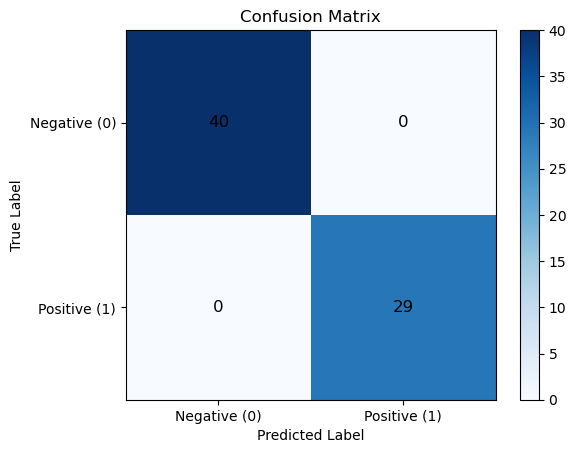

In [49]:
plot_confusion_matrix(ytest, predictions_test)

The model makes perfect predictions, so using cross-validation is not needed. However, it may still be possible to bring both training and test losses further down, due to the probabilistic nature of the cross-entropy loss.

### Helper functions for k-fold cross validation

In [50]:
def k_fold_split(X, K = 5):
    """
    Split the data into K folds.

    y is not passed as an argument because the function 
    does not handle X and y directly, but it returns 
    indices that are applied to both X and y.

    Args:
        X (numpy array): Input features, shape (n, d)
        K (integer): Number of folds

    Returns:
        folds (list of tuples) - Each tuple contains two numpy arrays:
            - train_indices (numpy array): Indices for the training set
            - val_indices (numpy array): Indices for the validation set
    
    """

    n = X.shape[0]
    indices = np.arange(n)

    # Randomise the indices
    np.random.shuffle(indices)

    fold_size = n // K
    folds = []

    for k in range(K):
        start = k * fold_size
        end = (k + 1) * fold_size if k != K - 1 else n
        val_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])
        folds.append((train_indices, val_indices))
    
    return folds


In [51]:
def k_fold_cross_validation(X, y_true, lambda_set, gamma, K=5, SGD=False, seed=None):
    """
    Implement K-fold cross-validation with the one standard error rule.
    
    Args:
        X (numpy array): Input features, shape (n, d)
        y_true (numpy array): True target values (n,)
        lambda_set (list): List of regularization strengths to evaluate
        gamma (float): learning rate or step size
        K (int): Number of folds for cross-validation
    
    Returns:
        selected_lambda (float): Lambda selected using the one standard error rule
        mean_losses (list): Mean validation losses for each lambda

    """

    folds = k_fold_split(X, K)
    mean_losses = []
    std_losses = []

    for lam in lambda_set:
        fold_losses = []

        for train_indices, val_indices in folds:
            # Split the data into training and validation sets
            X_train, y_train = X[train_indices], y_true[train_indices]
            X_val, y_val = X[val_indices], y_true[val_indices]
            
            # Train the model with L2 regularization
            if not SGD:
                w, _ = grad_logistic_regression_reg(X_train, y_train, gamma, lam)
            else:
                w, _ = logistic_regression_reg_sgd_train(X_train, y_train, gamma, lam, seed)

            # Compute L2 regularized loss on validation set
            val_loss = cross_entropy_l2_loss(w, X_val, y_val, lam)
            fold_losses.append(val_loss)

        # Average loss and standard deviation for each lambda
        mean_losses.append(np.mean(fold_losses))
        std_losses.append(np.std(fold_losses))

    # Compute standard error for each lambda
    std_errors = [std / np.sqrt(K) for std in std_losses]

    # Find the index of the lambda with the minimum mean loss
    best_lambda_idx = np.argmin(mean_losses)

    # Compute the threshold for the one standard error rule
    threshold = mean_losses[best_lambda_idx] + std_errors[best_lambda_idx]

    # Select the simplest lambda within the threshold
    for i, mean_loss in enumerate(mean_losses):
        if mean_loss <= threshold:
            selected_lambda = lambda_set[i]
            break

    return selected_lambda, np.array(mean_losses)



### Cross validation

In [52]:
lambda_set = np.logspace(-3, 0, 10)
lambda_set

array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])

In [53]:
selected_lambda, mean_losses = k_fold_cross_validation(Xtrain_dummy, ytrain, lambda_set, gamma, K=5)
print(f"The optimal lambda is: {selected_lambda}, and the mean losses are: {mean_losses}")

The optimal lambda is: 0.001, and the mean losses are: [0.16874514 0.1694904  0.17108899 0.17450074 0.18170422 0.19657138
 0.22584546 0.2783834  0.35834106 0.45411611]


In [54]:
# Now we can repeat the experiment with the new L2 penalty lambda
w, losses = grad_logistic_regression_reg(Xtrain_dummy, ytrain, gamma, lam = selected_lambda, tol= 1e-4, maxIters= 1000000)
print("Train losses:" , losses[::-1])
predictions_train = predict_logistic_regression(w, Xtrain_dummy)

test_loss = cross_entropy_loss(w, Xtest_dummy, ytest)
print(f"Test Loss is: {test_loss}")

predictions_test = predict_logistic_regression(w, Xtest_dummy)
success_metric_test = compute_metrics(ytest, predictions_test)

# Print metrics
for metric, value in success_metric_test.items():
    print(f"{metric.capitalize()}: {value* 100:.2f}%")

Converged after 62332 iterations because of small gradient.
Train losses: [0.0106145  0.0106145  0.0106145  ... 0.65600495 0.67417749 0.69314718]
Test Loss is: 0.004199860644245452
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1_score: 100.00%


Both train and test losses significantly lowered when using the L2 penalty selected by cross-validation, respectively reaching `0.0106145` and `0.004199860644245452` from `0.17968498` and `0.0916820267097807 `. Notice that the cross-entropy loss is seen as the ground truth in this experiment because of its probabilistic nature, which penalises overconfident missclassifications. On the other hand, success metrics such as `Accuracy` are easier to interpret by humans and, for practical applications, and, therefore they are added as complementary metrics. Last but not least, the fact that the test loss is lower than the train loss looks odd, but this may be due to a stochastic effect caused by the small dataset size.

As a final experiment, we will train the model using stochastic gradient descent (SGD). From the next model, we can expect a faster but noisier convergence. Moreover, mini-batch methods rarely reach exactly the global minimum, even if the loss function is quadratic, which is not in this case, due to the higher dimensionality of the dataset.

### Train with SGD

In [55]:
selected_lambda_SGD, mean_losses = k_fold_cross_validation(Xtrain_dummy, ytrain, lambda_set, gamma, K=5, SGD=True, seed=GLOBAL_SEED)

Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gradient.
Converged after 2 iterations because of small gr

In [56]:
w, losses = logistic_regression_reg_sgd_train(Xtrain_dummy, ytrain, gamma, lam = selected_lambda_SGD, tol= 1e-4, maxIters= 1000000, seed=GLOBAL_SEED)
print("Train losses:" , losses[::-1])
predictions_train = predict_logistic_regression(w, Xtrain_dummy)

test_loss = cross_entropy_loss(w, Xtest_dummy, ytest)
print(f"Test Loss is: {test_loss}")

predictions_test = predict_logistic_regression(w, Xtest_dummy)
success_metric_test = compute_metrics(ytest, predictions_test)

# Print metrics
for metric, value in success_metric_test.items():
    print(f"{metric.capitalize()}: {value* 100:.2f}%")

Converged after 30 iterations because of small gradient.
Train losses: [0.0120755  0.01217091 0.01227474 0.01238819 0.01251233 0.01264851
 0.01279822 0.01296326 0.01314628 0.01334897 0.01357549 0.0138293
 0.01411474 0.01443847 0.01480597 0.01522687 0.01571214 0.01627758
 0.01694115 0.01773172 0.01868112 0.01984636 0.02130096 0.02316866
 0.02562756 0.02901767 0.03398276 0.04194314 0.05683431 0.09586008]
Test Loss is: 0.007561109977003109
Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1_score: 100.00%


With `0.0120755` and `0.007561109977003109`, both train and test losses are just slightly higher than when using full-batch (`0.0106145` and `0.004199860644245452`), with a convergence that is by orders of magnitude faster. Moreover, although in this case there is no need to plot the confusion matrix again, since all predictions remain perfect, usually that would be a good point of comparison between models, since it shows where different models struggle the most.

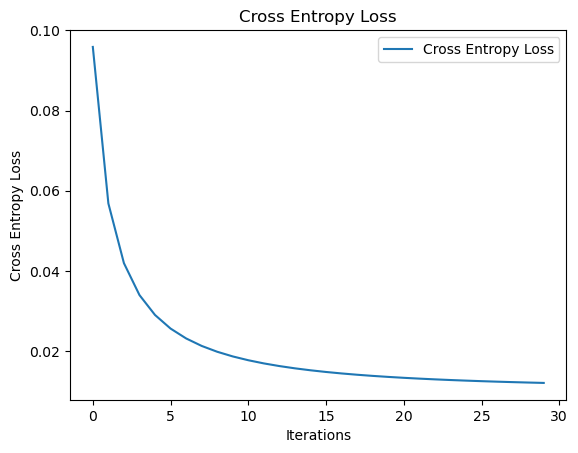

In [57]:
# Plot training losses to inspect conversion
plot_losses(losses)

## REFERENCES
- Arroyo, M. (2023). 🐧 Palmer Penguins for binary classification. Kaggle.com. https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification

## Conclusions
This small tutorial shows how to train a classification model with logistic regression on a simple dataset. The focus on the notebook is the mathematics behind machine learning, and how modelling happens under the hood.